In [11]:
from google.colab import drive
drive.mount('./gmount')

Drive already mounted at ./gmount; to attempt to forcibly remount, call drive.mount("./gmount", force_remount=True).


In [12]:
import scipy.io
import numpy as np
data = scipy.io.loadmat('/content/gmount/MyDrive/esame_da/train_8feb23.mat')
data = np.array(data['train'])
X = data[:,:20]
y = data[:,20]
X = X - np.mean(X, axis=0)

In [13]:
import seaborn as sns; sns.set()
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

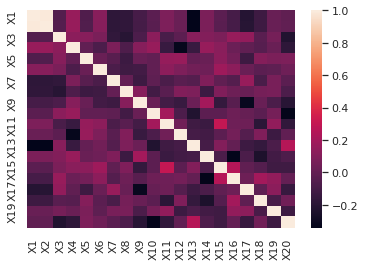

In [14]:
# CORRELATION MATRIX OF THE ORIGINAL DATA
# To better visualize the data features dependencies let us compute the data set
# correlation matrix
df = pd.DataFrame.from_dict({'X1': X[:,0], 'X2': X[:,1],
                             'X3': X[:,2], 'X4': X[:,3],
                             'X5': X[:,4], 'X6': X[:,5],
                             'X7': X[:,6], 'X8': X[:,7],
                             'X9': X[:,8], 'X10': X[:,9],
                             'X11': X[:,10], 'X12': X[:,11],
                             'X13': X[:,12], 'X14': X[:,13], 'X15': X[:,14], 'X16': X[:,15], 'X17': X[:,16], 'X18': X[:,17], 'X19': X[:,18], 'X20': X[:,19]})
#print(df.corr())
sns.heatmap(df.corr())

In [18]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
pca_scale = PCA(n_components=15)
pca_scale.fit(X_scale)
# the method transform gives the principal components, i.e. computes X*V (X*W)
X_pca_scale = pca_scale.transform(X_scale) 
print("original shape:   ", X_scale.shape)
print("transformed shape:", X_pca_scale.shape)

print('Variance with scaled data')
pc_dirs = pca_scale.components_
pc_var = pca_scale.explained_variance_
var_pca_scale = pd.DataFrame(np.stack((pca_scale.explained_variance_, pca_scale.explained_variance_ratio_), axis=1), columns=['Eigenvalues', 'Explained variance'])
print(var_pca_scale)

print(np.array(pca_scale.explained_variance_ratio_).sum())

original shape:    (24000, 20)
transformed shape: (24000, 15)
Variance with scaled data
    Eigenvalues  Explained variance
0      2.482751            0.124132
1      1.939623            0.096977
2      1.866575            0.093325
3      1.508626            0.075428
4      1.454699            0.072732
5      1.337340            0.066864
6      1.270851            0.063540
7      1.120305            0.056013
8      1.100607            0.055028
9      0.969279            0.048462
10     0.887861            0.044391
11     0.786476            0.039322
12     0.664406            0.033219
13     0.584611            0.029229
14     0.542516            0.027125
0.9257877382371306


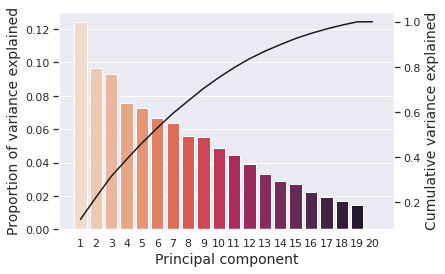

In [17]:
idx = np.arange(20)+1
df_explained_variance_scale = pd.DataFrame([pca_scale.explained_variance_ratio_, np.cumsum(pca_scale.explained_variance_ratio_)], 
                                     index=['Proportion of variance explained', 'cumulative'], 
                                     columns=idx).T
fig, ax1 = plt.subplots()
ax1.set_xlabel('Principal component', fontsize=14)
ax1.set_ylabel('Proportion of variance explained', fontsize=14)
ax2 = sns.barplot(x=idx, y='Proportion of variance explained', data=df_explained_variance_scale, palette='rocket_r')
ax2 = ax1.twinx()
ax2.grid(False)
ax2.set_ylabel('Cumulative variance explained', fontsize=14)
ax2 = sns.lineplot(x=idx-1, y='cumulative', data=df_explained_variance_scale, color='k')

In [19]:
import numpy as np

def sigmoid(f_b):
    return 1 / (1 + np.exp(-f_b))

def predict_prob(X, beta):
    f_b = np.dot(X, beta.T)
    return sigmoid(f_b)

def predict(X, beta):
    prob = predict_prob(X, beta)
    return np.where(prob >= 0.5, 1, -1)

def log_loss(y_true, y_pred):
    if y_true == -1:
        y_true = 0
    return - ( y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred) )

def sgd_with_constant_step(X, y, learning_rate, num_iter):
    m, n = X.shape
    beta = np.zeros(n)
    
    for i in range(num_iter):
        for j in range(m):
            X_i = X[j, :].reshape(1, n)
            y_i = y[j].reshape(1, 1)
            prediction = predict_prob(X_i, beta)
            error = log_loss(y_i, prediction)
            gradient =  np.dot(X_i.T, (prediction - y_i))
            beta = beta - learning_rate * gradient.T
    return beta

In [21]:
#PCA
trained_weights = sgd_with_constant_step(X_pca_scale,y,0.1,1)
trained_weights



<ipython-input-19-dbaf34fd0521>:17: RuntimeWarning: divide by zero encountered in log
  return - ( y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred) )
<ipython-input-19-dbaf34fd0521>:17: RuntimeWarning: invalid value encountered in multiply
  return - ( y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred) )
<ipython-input-19-dbaf34fd0521>:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-f_b))


array([[-1.61417722e+03, -6.86941410e+01,  4.00076982e+02,
        -1.17574683e+02, -2.00549729e+00,  1.26951430e+02,
        -1.77784823e+02, -6.59099507e+01,  6.83951684e+01,
        -1.08563862e+02, -1.10588912e+02,  6.50811343e+01,
         1.84639330e+01,  7.64390964e+01,  1.10454240e+00]])

<ipython-input-31-26623f764501>:17: RuntimeWarning: divide by zero encountered in log
  return - y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)
<ipython-input-31-26623f764501>:17: RuntimeWarning: invalid value encountered in multiply
  return - y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)
<ipython-input-31-26623f764501>:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-f_b))


time:  [0.3674920082092285, 0.361515576839447, 0.385735547542572, 0.35607276439666746, 0.36810658693313597, 0.38860167026519776, 0.43738184452056883, 0.4349908423423767, 0.4385174989700317, 0.45036214113235473]


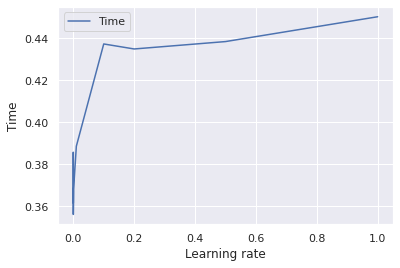

In [ ]:
import time
def plot_learning_curve_time(X, y, num_iter, learning_rates):
    m, n = X.shape
    times = []
    
    for learning_rate in learning_rates:      
        sum = 0
        for i in range(100):
            st = time.time()
            theta = sgd_with_constant_step(X, y, learning_rate, num_iter)
            et = time.time()
            elapsed_time = et - st
            sum += elapsed_time
        times.append(sum/100)

    print("time: ", times)    
    plt.plot(learning_rates, times, label='Time')
    plt.xlabel('Learning rate')
    plt.ylabel('Time')
    plt.legend()
    plt.show()

#learning_rates = [0.001, 0.002, 0.005, 0.01, 0.02]
learning_rates = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1.0]

plot_learning_curve_time(X_pca_scale, y, 1, learning_rates)

In [22]:
test_data = scipy.io.loadmat('/content/gmount/MyDrive/esame_da/test_8feb23.mat')

test_data = np.array(test_data['test'])
X_test = test_data[:,:20]
instants = test_data[:,20]
X_test = X_test - np.mean(X_test, axis=0)

X_test_scale = scaler.fit_transform(X_test)
# the method transform gives the principal components, i.e. computes X*V (X*W)
X_test_pca_scale = pca_scale.transform(X_test_scale) # WITH THE SAME TRANSFORMATION AS THE TRAINING SET (THE SAME w)
print("original shape:   ", X_test_scale.shape)
print("transformed shape:", X_test_pca_scale.shape)

#print('Variance with scaled data')
#pc_dirs = pca_scale.components_
#pc_var = pca_scale.explained_variance_
#var_pca_scale = pd.DataFrame(np.stack((pca_scale.explained_variance_, pca_scale.explained_variance_ratio_), axis=1), columns=['Eigenvalues', 'Explained variance'])
#print(var_pca_scale)

#print(np.array(pca_scale.explained_variance_ratio_).sum())
results = []
for i in range(X_test_pca_scale.shape[0]):
  #results.append(predict(X_test_pca_scale[i,:],trained_weights)[0])
  results.append(predict(X_test_pca_scale[i,:],trained_weights)[0])
  
#results = lr.predict(X_test_scale[:,:])

string = ""
for elem in results:
  if elem == -1:
    elem = 0
  string += str(elem)
print(string)

def binary_to_ascii(binary):
    binary_list = [binary[i:i + 8] for i in range(0, len(binary), 8)]
    ascii_list = [chr(int(x, 2)) for x in binary_list]
    return ''.join(ascii_list)
 
result = binary_to_ascii(string)
print(result)

original shape:    (80, 20)
transformed shape: (80, 15)
01010111011011100111010001110010010000110110111101101101011010010110111001100111
WntrComing


<ipython-input-19-dbaf34fd0521>:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-f_b))


In [23]:
y_test_ = [-1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1]
y_test = np.array(y_test_)




<ipython-input-19-dbaf34fd0521>:17: RuntimeWarning: divide by zero encountered in log
  return - ( y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred) )
<ipython-input-19-dbaf34fd0521>:17: RuntimeWarning: invalid value encountered in multiply
  return - ( y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred) )
<ipython-input-19-dbaf34fd0521>:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-f_b))
<ipython-input-19-dbaf34fd0521>:17: RuntimeWarning: divide by zero encountered in log
  return - ( y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred) )
<ipython-input-19-dbaf34fd0521>:17: RuntimeWarning: invalid value encountered in multiply
  return - ( y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred) )
<ipython-input-19-dbaf34fd0521>:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-f_b))
<ipython-input-19-dbaf34fd0521>:17: RuntimeWarning: divide by zero encountered in log
  return - ( y_true * np.log(y_pred) + (

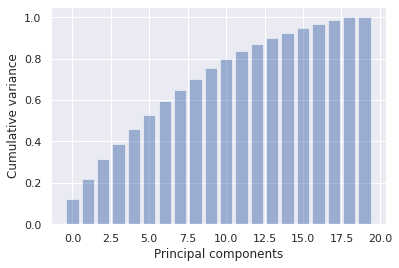

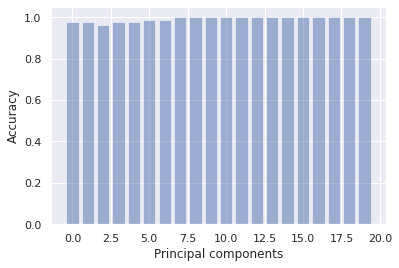

In [25]:
from sklearn.metrics import accuracy_score

# Let us apply the PCA and to classify the samples with a SGD
accuracy = []
n_components = 20
for K in range(1,n_components+1):
    pca = PCA(n_components = K)
    X_train_pca = pca.fit_transform(X_scale)
    X_test_pca = pca.transform(X_test_scale)
    trained_weights = sgd_with_constant_step(X_train_pca,y,0.1,1)
    y_pred = predict(X_test_pca,trained_weights)
    accuracy.append(accuracy_score(y_test, y_pred))

def plot_bar_chart(data, interval, x_label, y_label):
    plt.bar(interval, data, alpha = 0.5, align='center')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plot_bar_chart(cumulative_variance, np.arange(n_components), 'Principal components', 'Cumulative variance')
plot_bar_chart(accuracy, np.arange(n_components), 'Principal components', 'Accuracy')